In [49]:
#Importing all the required packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [50]:
#Reading the raw data
data = pd.read_csv('final_2019_final.csv')

In [51]:
#Understanding the data columns fron the raw data
data.info()
column_name = 'Unnamed: 0'
data = data.drop(column_name, axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757582 entries, 0 to 3757581
Data columns (total 20 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   dob_yy      int64  
 2   dob_tt      int64  
 3   mager       int64  
 4   cig_0       int64  
 5   cig_1       int64  
 6   cig_2       int64  
 7   cig_3       int64  
 8   cig_rec     object 
 9   bmi         float64
 10  wtgain      int64  
 11  rf_gdiab    object 
 12  rf_ghype    object 
 13  rf_ehype    object 
 14  rf_inftr    object 
 15  sex         object 
 16  dbwt        int64  
 17  precare     int64  
 18  previs      int64  
 19  mother_age  object 
dtypes: float64(1), int64(12), object(7)
memory usage: 573.4+ MB


In [52]:
#Removing the rows with unreported data values
data=data[data['cig_rec']!='U']
data=data[data['rf_gdiab']!='U']
data=data[data['rf_ghype']!='U']
data=data[data['rf_ehype']!='U']
data=data[data['rf_inftr']!='U']
data=data[data['precare'] <=10]
data=data[data['cig_0'] <99]
data=data[data['cig_1'] <99]
data=data[data['cig_2'] <99]
data=data[data['cig_3'] <99]
data=data[data['dbwt']<9999]
data=data[data['bmi']<99.9]
data=data[data['wtgain']<99]
data=data[data['previs']<99]

In [53]:
data.head()

,dob_yy,dob_tt,mager,cig_0,cig_1,cig_2,cig_3,cig_rec,bmi,wtgain,rf_gdiab,rf_ghype,rf_ehype,rf_inftr,sex,dbwt,precare,previs,mother_age
0,2019,1135,29,0,0,0,0,N,29.8,28,Y,Y,N,N,F,1537,2,28,Medium
1,2019,1305,40,0,0,0,0,N,24.2,54,N,Y,N,N,F,3715,3,12,Old
2,2019,800,30,10,5,5,5,Y,20.8,49,N,N,N,N,M,3155,3,8,Medium
3,2019,130,25,0,0,0,0,N,23.2,19,Y,N,N,N,M,3600,2,11,Medium
5,2019,738,30,0,0,0,0,N,32.6,10,N,N,N,N,F,2863,3,11,Medium


In [54]:
#Summary Statistics for the dump
data.describe()

,dob_yy,dob_tt,mager,cig_0,cig_1,cig_2,cig_3,bmi,wtgain,dbwt,precare,previs
count,3514063.0,3.514063e+06,3.514063e+06,3.514063e+06,3.514063e+06,3.514063e+06,3.514063e+06,3.514063e+06,3.514063e+06,3.514063e+06,3.514063e+06,3.514063e+06
mean,2019.0,1.230082e+03,2.911967e+01,1.000715e+00,6.207174e-01,4.684139e-01,4.127743e-01,2.730101e+01,2.951927e+01,3.272602e+03,2.902100e+00,1.139076e+01
std,0.0,6.329955e+02,5.800683e+00,4.546776e+00,3.284805e+00,2.727214e+00,2.537620e+00,6.756727e+00,1.506753e+01,5.549242e+02,1.507893e+00,4.187140e+00
min,2019.0,0.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.310000e+01,0.000000e+00,2.300000e+02,0.000000e+00,0.000000e+00
25%,2019.0,7.590000e+02,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.230000e+01,2.000000e+01,2.970000e+03,2.000000e+00,9.000000e+00
50%,2019.0,1.238000e+03,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.580000e+01,2.900000e+01,3.300000e+03,3.000000e+00,1.200000e+01
75%,2019.0,1.734000e+03,3.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.090000e+01,3.800000e+01,3.629000e+03,3.000000e+00,1.300000e+01
max,2019.0,9.999000e+03,5.000000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,6.990000e+01,9.800000e+01,8.165000e+03,1.000000e+01,9.800000e+01


In [55]:
#Creating the weight categorical column
data['unhealthy_weight'] = ~((data['dbwt'] >= 2500) & (data['dbwt'] <= 4500))
data['unhealthy_weight'] = data['unhealthy_weight'].astype(int)
data.head()

,dob_yy,dob_tt,mager,cig_0,cig_1,cig_2,cig_3,cig_rec,bmi,wtgain,rf_gdiab,rf_ghype,rf_ehype,rf_inftr,sex,dbwt,precare,previs,mother_age,unhealthy_weight
0,2019,1135,29,0,0,0,0,N,29.8,28,Y,Y,N,N,F,1537,2,28,Medium,1
1,2019,1305,40,0,0,0,0,N,24.2,54,N,Y,N,N,F,3715,3,12,Old,0
2,2019,800,30,10,5,5,5,Y,20.8,49,N,N,N,N,M,3155,3,8,Medium,0
3,2019,130,25,0,0,0,0,N,23.2,19,Y,N,N,N,M,3600,2,11,Medium,0
5,2019,738,30,0,0,0,0,N,32.6,10,N,N,N,N,F,2863,3,11,Medium,0


In [56]:
#Checking the unhealthy weight proportion
average_proportion_unhealthy = data['unhealthy_weight'].mean()
average_proportion_unhealthy

0.08577193977455726

In [57]:
#Proportion of Unhealthy Weights with Hypertension
proportion_unhealthy_hypertension = data.groupby('rf_ghype')['unhealthy_weight'].mean()
proportion_unhealthy_hypertension

rf_ghype
N    0.077567
Y    0.183099
Name: unhealthy_weight, dtype: float64

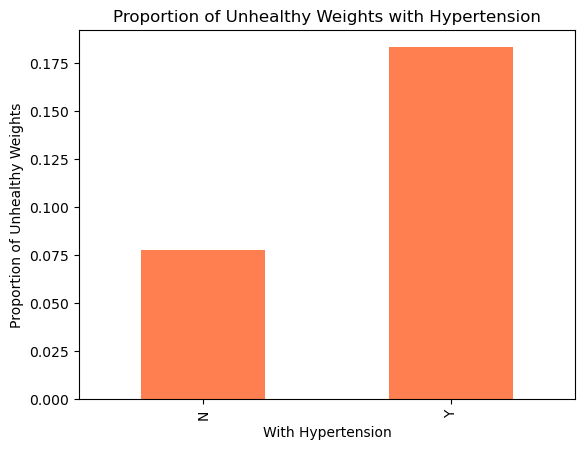

In [58]:
#Bar Plot for Proportion of Unhealthy Weights with Hypertension
proportion_unhealthy_hypertension.plot(kind='bar', color='coral')
plt.title('Proportion of Unhealthy Weights with Hypertension')
plt.xlabel('With Hypertension')
plt.ylabel('Proportion of Unhealthy Weights')
plt.show()

In [59]:
#Proportion of Unhealthy Weights with Diabetes
proportion_unhealthy_diabetes = data.groupby('rf_gdiab')['unhealthy_weight'].mean()
proportion_unhealthy_diabetes

rf_gdiab
N    0.084384
Y    0.104376
Name: unhealthy_weight, dtype: float64

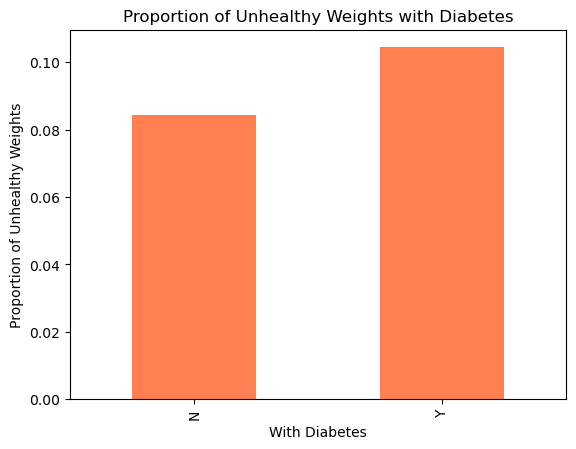

In [60]:
#Bar plot for Proportion of Unhealthy Weights with Diabetes
proportion_unhealthy_diabetes.plot(kind='bar', color='coral')
plt.title('Proportion of Unhealthy Weights with Diabetes')
plt.xlabel('With Diabetes')
plt.ylabel('Proportion of Unhealthy Weights')
plt.show()

In [61]:
#Proportion of Unhealthy Weights with Eclampsia
proportion_unhealthy_eclamp = data.groupby('rf_ehype')['unhealthy_weight'].mean()
proportion_unhealthy_eclamp

rf_ehype
N    0.085158
Y    0.307946
Name: unhealthy_weight, dtype: float64

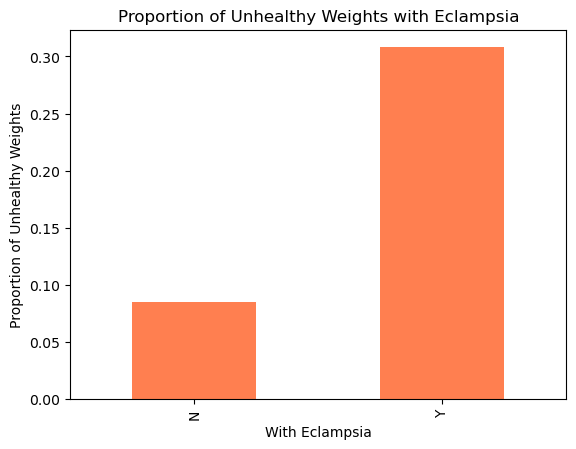

In [62]:
#bar plot of Proportion of Unhealthy Weights with Eclampsia
proportion_unhealthy_eclamp.plot(kind='bar', color='coral')
plt.title('Proportion of Unhealthy Weights with Eclampsia')
plt.xlabel('With Eclampsia')
plt.ylabel('Proportion of Unhealthy Weights')
plt.show()

In [63]:
#Proportion of Unhealthy Weights with Infertility Treatment
proportion_unhealthy_infertility = data.groupby('rf_inftr')['unhealthy_weight'].mean()
proportion_unhealthy_infertility

rf_inftr
N    0.083950
Y    0.173229
Name: unhealthy_weight, dtype: float64

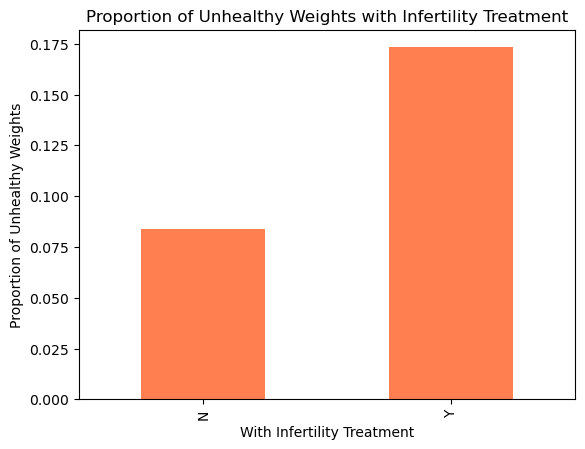

In [64]:
#Bar plot of Proportion of Unhealthy Weights with Infertility Treatment
proportion_unhealthy_infertility.plot(kind='bar', color='coral')
plt.title('Proportion of Unhealthy Weights with Infertility Treatment')
plt.xlabel('With Infertility Treatment')
plt.ylabel('Proportion of Unhealthy Weights')
plt.show()

In [65]:
#Proportion of Unhealthy Weights with Mother Smoking
proportion_unhealthy_smoker = data.groupby('cig_rec')['unhealthy_weight'].mean()
proportion_unhealthy_smoker

cig_rec
N    0.082487
Y    0.138547
Name: unhealthy_weight, dtype: float64

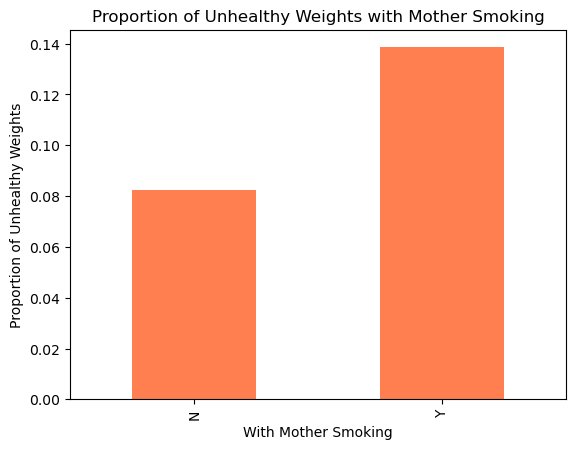

In [66]:
#Bar plot Proportion of Unhealthy Weights with Mother Smoking
proportion_unhealthy_smoker.plot(kind='bar', color='coral')
plt.title('Proportion of Unhealthy Weights with Mother Smoking')
plt.xlabel('With Mother Smoking')
plt.ylabel('Proportion of Unhealthy Weights')
plt.show()

In [67]:
#Proportion of Unhealthy Weights by Mother Age
proportion_unhealthy_motherage = data.groupby('mother_age')['unhealthy_weight'].mean()
proportion_unhealthy_motherage

mother_age
Medium    0.081407
Old       0.097471
Teen      0.095087
Young     0.085298
Name: unhealthy_weight, dtype: float64

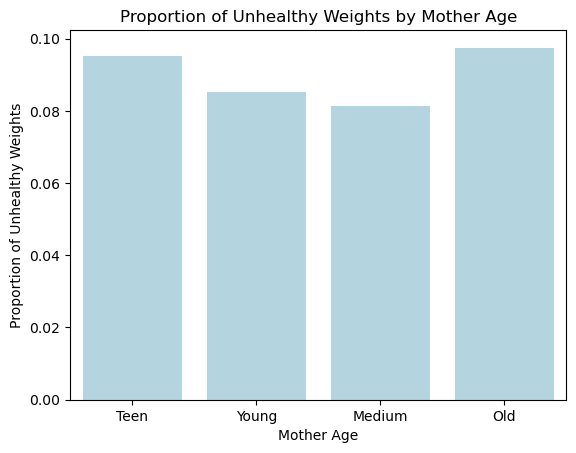

In [68]:

#Bar plot for Proportion of Unhealthy Weights by Mother Age
order = ['Teen', 'Young', 'Medium', 'Old']
sns.barplot(x=proportion_unhealthy_motherage.index, y=proportion_unhealthy_motherage.values, order=order, color='lightblue')
plt.title('Proportion of Unhealthy Weights by Mother Age')
plt.xlabel('Mother Age')
plt.ylabel('Proportion of Unhealthy Weights')
plt.show()

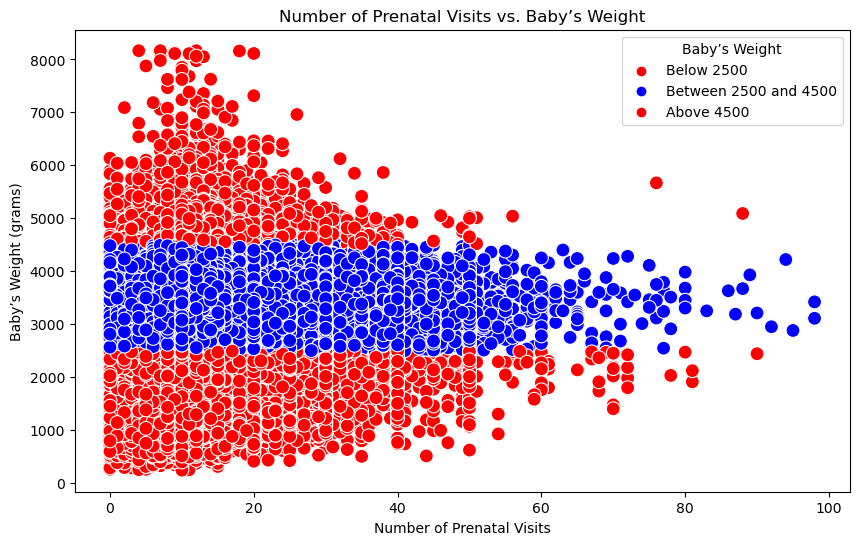

In [69]:
#Number of Prenatal Visits vs. Baby’s Weight
plt.figure(figsize=(10, 6))

# Assuming 'data' is your DataFrame
sns.scatterplot(
    x='previs',
    y='dbwt',
    data=data,
    hue=data['dbwt'].apply(lambda x: 'Below 2500' if x < 2500 else ('Above 4500' if x > 4500 else 'Between 2500 and 4500')),
    palette={'Below 2500': 'red', 'Above 4500': 'red', 'Between 2500 and 4500': 'blue'},
    s=100
)

# Add labels and title
plt.title('Number of Prenatal Visits vs. Baby’s Weight')
plt.xlabel('Number of Prenatal Visits')
plt.ylabel("Baby’s Weight (grams)")

# Show legend with a corrected title
plt.legend(title="Baby’s Weight", loc='upper right')

# Display the plot
plt.show()

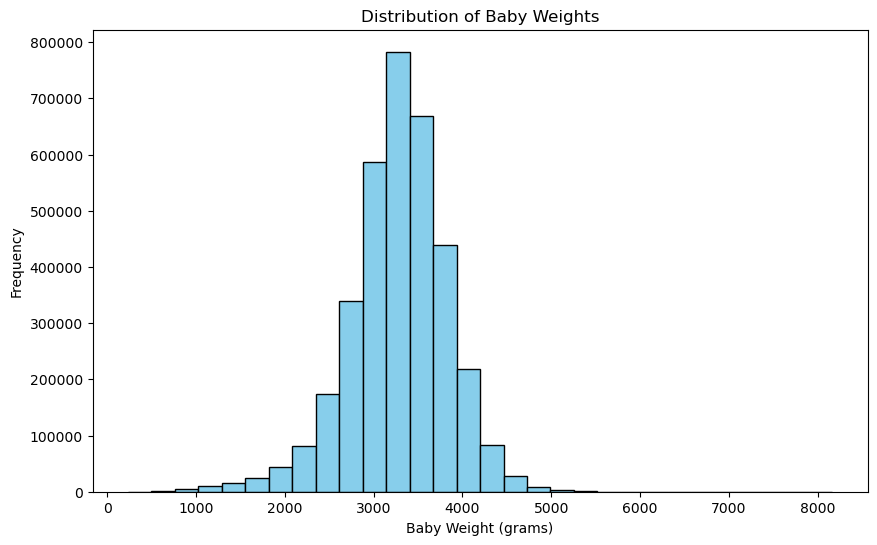

In [70]:
#Distribution of Baby Weights
plt.figure(figsize=(10, 6))
plt.hist(data['dbwt'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Baby Weights')
plt.xlabel('Baby Weight (grams)')
plt.ylabel('Frequency')
plt.show()

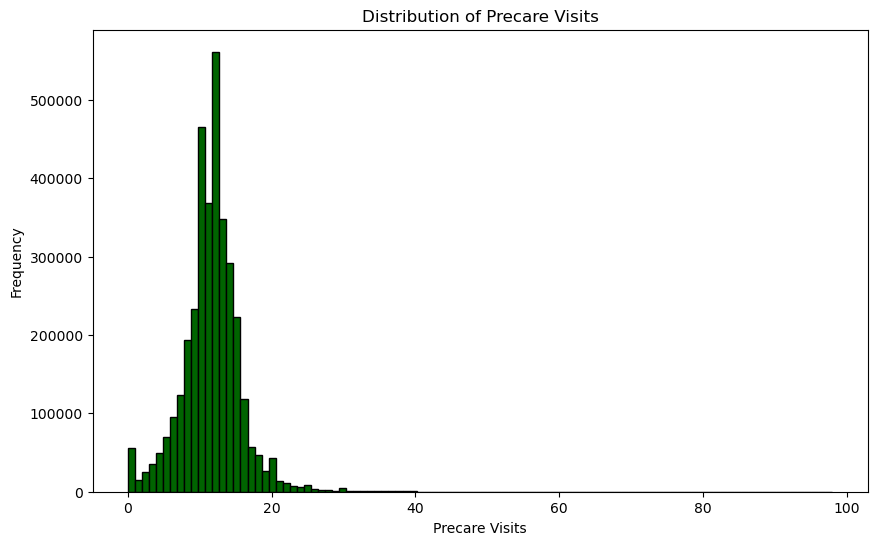

In [71]:
#Distribution of Precare visits
plt.figure(figsize=(10, 6))
plt.hist(data['previs'], bins=100, color='darkgreen', edgecolor='black')
plt.title('Distribution of Precare Visits')
plt.xlabel('Precare Visits')
plt.ylabel('Frequency')
plt.show()

In [72]:
#Distribution of Mother's in age category
data_age=data['mother_age'].value_counts()
data_age

mother_age
Medium    2036185
Young      658577
Old        658122
Teen       161179
Name: count, dtype: int64

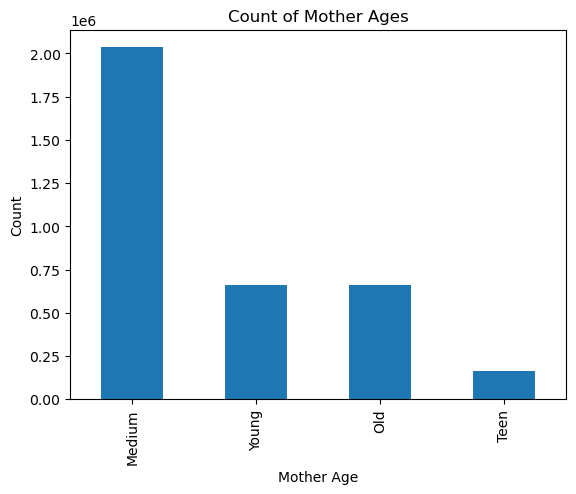

In [73]:
#Distribution of mothers in each age category
data_age = data['mother_age'].value_counts()

# Plot a bar chart
data_age.plot(kind='bar')
plt.xlabel('Mother Age')
plt.ylabel('Count')
plt.title('Count of Mother Ages')
plt.show()

In [74]:
#Distribution of babies across gender
data_sex=data['sex'].value_counts()
data_sex

sex
M    1797602
F    1716461
Name: count, dtype: int64

In [75]:
#Distribution of precare visits 
data_precare=data['precare'].value_counts()
data_precare

precare
2     1425673
3     1115098
4      310799
1      197681
5      155845
6       96201
7       75858
8       57708
0       55734
9       23116
10        350
Name: count, dtype: int64

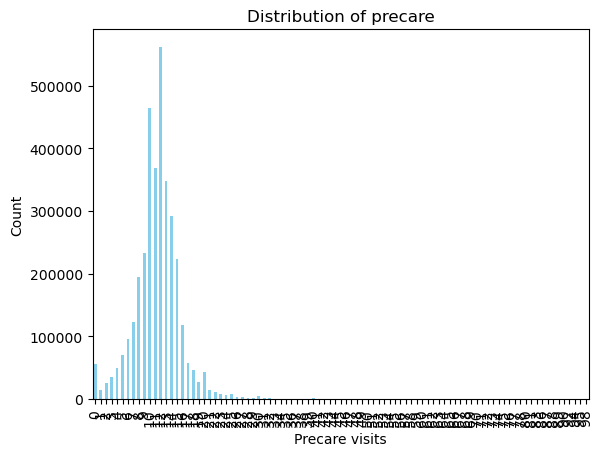

In [76]:
# Distribution of PreCare Visits plot
import matplotlib.pyplot as plt

# Assuming data_precare is a pandas Series with the counts of each unique value
data_precare = data['previs'].value_counts()

# Sorting the data by index (unique values) in ascending order
data_precare = data_precare.sort_index()

# Plotting a bar graph
data_precare.plot(kind='bar', color='skyblue')
plt.title('Distribution of precare')
plt.xlabel('Precare visits')
plt.ylabel('Count')
plt.show()

In [77]:
## Distribution of babies across smoking habits
data_cigrec=data['cig_rec'].value_counts()
data_cigrec

cig_rec
N    3308148
Y     205915
Name: count, dtype: int64

In [78]:
# Distribution of babies across Diabetes
data_rf_gdiab=data['rf_gdiab'].value_counts()
data_rf_gdiab

rf_gdiab
N    3270023
Y     244040
Name: count, dtype: int64

In [79]:
# Distribution of babies across Hypertension
data_rf_ghype=data['rf_ghype'].value_counts()
data_rf_ghype

rf_ghype
N    3240845
Y     273218
Name: count, dtype: int64

In [80]:
# Distribution of babies across Eclampsia
data_rf_ehype=data['rf_ehype'].value_counts()
data_rf_ehype

rf_ehype
N    3504373
Y       9690
Name: count, dtype: int64

In [81]:
# Distribution of babies across infertility treatment
data_rf_inftr=data['rf_inftr'].value_counts()
data_rf_inftr

rf_inftr
N    3442343
Y      71720
Name: count, dtype: int64

In [82]:
# Means of Baby weight for mothers of different age category
data_v1=data.groupby('mother_age')['dbwt'].mean().reset_index()
data_v1

,mother_age,dbwt
0,Medium,3294.308147
1,Old,3276.432152
2,Teen,3162.452298
3,Young,3228.619953


/var/folders/v3/4p4d3s9d0r52gzcp8sz0sq8h0000gn/T/ipykernel_71790/3840090164.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='mother_age', y='dbwt', data=data_v1, ci=None, order=order)


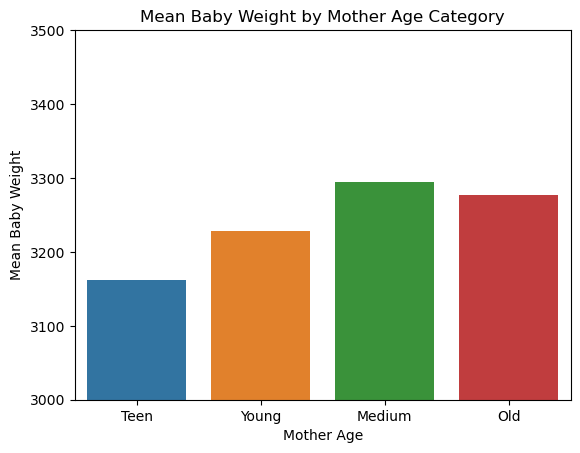

In [83]:
# Means of Baby weight for mothers of different age category
order = ['Teen', 'Young', 'Medium', 'Old']

sns.barplot(x='mother_age', y='dbwt', data=data_v1, ci=None, order=order)
plt.xlabel('Mother Age')
plt.ylabel('Mean Baby Weight')
plt.title('Mean Baby Weight by Mother Age Category')
plt.ylim(3000, 3500)
plt.show()

In [84]:
data_v2=data.groupby('precare')['dbwt'].mean().reset_index()
data_v2

,precare,dbwt
0,0,3059.852639
1,1,3200.993879
2,2,3290.784563
3,3,3294.502253
4,4,3250.709832
5,5,3220.511021
6,6,3209.959637
7,7,3220.669303
8,8,3252.559420
9,9,3341.903444


/var/folders/v3/4p4d3s9d0r52gzcp8sz0sq8h0000gn/T/ipykernel_71790/158714618.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='precare', y='dbwt', data=data_v2, estimator=np.median, ci=None)


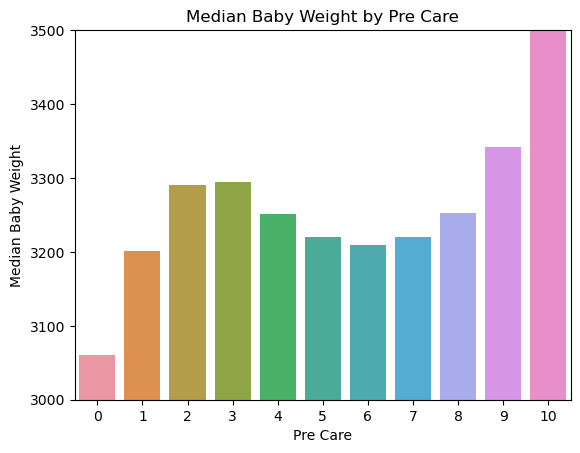

In [85]:
#Median baby weights distributed by the precare start month into the pregnancy
sns.barplot(x='precare', y='dbwt', data=data_v2, estimator=np.median, ci=None)
plt.xlabel('Pre Care')
plt.ylabel('Median Baby Weight')
plt.title('Median Baby Weight by Pre Care')
plt.ylim(3000,3500)
plt.show()

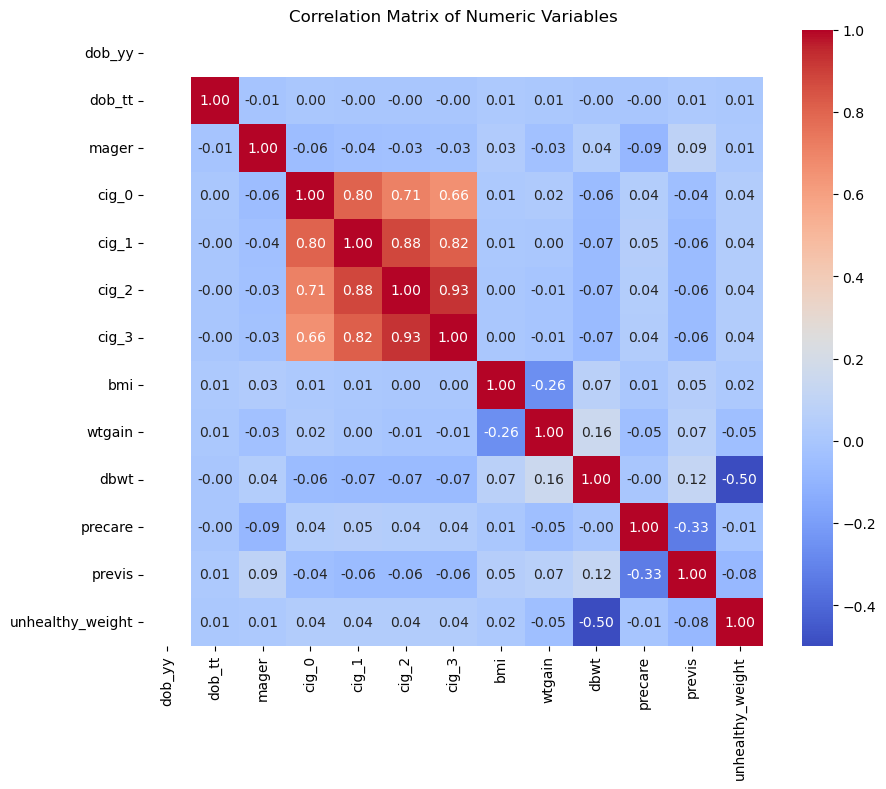

In [86]:
#Correlation evaluation for all variables
numeric_data = data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [87]:
#Creating Dummy Variables
data_dummy=pd.get_dummies(data, columns=['cig_rec','rf_gdiab', 'rf_ghype','rf_ehype','rf_inftr','sex','mother_age'], drop_first=True)


In [88]:
#Checking the columns
data_dummy.columns

Index(['dob_yy', 'dob_tt', 'mager', 'cig_0', 'cig_1', 'cig_2', 'cig_3', 'bmi',
       'wtgain', 'dbwt', 'precare', 'previs', 'unhealthy_weight', 'cig_rec_Y',
       'rf_gdiab_Y', 'rf_ghype_Y', 'rf_ehype_Y', 'rf_inftr_Y', 'sex_M',
       'mother_age_Old', 'mother_age_Teen', 'mother_age_Young'],
      dtype='object')

In [89]:
#Mother Age and Baby Weight Relation
import statsmodels.api as sm

#define predictor and response variables
y = data_dummy['dbwt']
x = data_dummy[['mother_age_Old',
         'mother_age_Teen','mother_age_Young']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x.astype(float)).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   dbwt   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4562.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:50:50   Log-Likelihood:            -2.7184e+07
No. Observations:             3514063   AIC:                         5.437e+07
Df Residuals:                 3514059   BIC:                         5.437e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3294.3081      0.388  

In [90]:
#Mother Age and Baby Weight split by sex and Cigs
import statsmodels.api as sm

#define predictor and response variables
y = data_dummy['dbwt']
x = data_dummy[['mother_age_Old',
         'mother_age_Teen','mother_age_Young','sex_M','cig_rec_Y']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x.astype(float)).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   dbwt   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                 1.536e+04
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:50:52   Log-Likelihood:            -2.7153e+07
No. Observations:             3514063   AIC:                         5.431e+07
Df Residuals:                 3514057   BIC:                         5.431e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3246.0900      0.493  

In [91]:
#3.Mother’s ailments vs Baby weight

import statsmodels.api as sm

#define predictor and response variables
y = data_dummy['dbwt']
x = data_dummy[['rf_gdiab_Y','rf_ghype_Y','rf_ehype_Y']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x.astype(float)).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   dbwt   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                 1.887e+04
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:50:53   Log-Likelihood:            -2.7163e+07
No. Observations:             3514063   AIC:                         5.433e+07
Df Residuals:                 3514059   BIC:                         5.433e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3291.4551      0.315   1.04e+04      0.0

In [92]:
#Relation between baby weight and Mother’s weight gain and diabetes 


import statsmodels.api as sm
data_dummy['wtgain_rf_gdiab_Y']=data_dummy['wtgain']*data_dummy['rf_gdiab_Y']

#define predictor and response variables
y = data_dummy['dbwt']
x = data_dummy[[
    'wtgain','rf_gdiab_Y','wtgain_rf_gdiab_Y']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x.astype(float)).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   dbwt   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                 2.953e+04
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:50:53   Log-Likelihood:            -2.7147e+07
No. Observations:             3514063   AIC:                         5.429e+07
Df Residuals:                 3514059   BIC:                         5.429e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3096.1169      0.67

In [93]:
#Relation between baby weight and diabetes
import statsmodels.api as sm

#define predictor and response variables
y = data_dummy['wtgain']
x = data_dummy[[
    'rf_gdiab_Y']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x.astype(float)).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 wtgain   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                 2.258e+04
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:50:54   Log-Likelihood:            -1.4507e+07
No. Observations:             3514063   AIC:                         2.901e+07
Df Residuals:                 3514061   BIC:                         2.901e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.8481      0.008   3593.696      0.0

In [94]:
#Infertility Treatment

import statsmodels.api as sm
#define predictor and response variables
y = data_dummy['dbwt']
x = data_dummy[['rf_inftr_Y']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x.astype(float)).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   dbwt   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5277.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:50:54   Log-Likelihood:            -2.7188e+07
No. Observations:             3514063   AIC:                         5.438e+07
Df Residuals:                 3514061   BIC:                         5.438e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3275.7034      0.299    1.1e+04      0.0

In [95]:
#Relation between precare and Bbay weight
import statsmodels.api as sm
#define predictor and response variables
y = data_dummy['dbwt']
x = data_dummy[['precare']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   dbwt   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     83.21
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           7.37e-20
Time:                        23:50:55   Log-Likelihood:            -2.7191e+07
No. Observations:             3514063   AIC:                         5.438e+07
Df Residuals:                 3514061   BIC:                         5.438e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3277.7988      0.642   5105.282      0.0

In [96]:
# Mog of Mother's weight gain and baby weight
import statsmodels.api as sm
data_dummy_wt=data_dummy[data_dummy['wtgain']>0]
data_dummy_wt['ln_wtgain']=np.log(data_dummy_wt['wtgain'])
data_dummy_wt['ln_dbwt']=np.log(data_dummy_wt['dbwt'])
data_dummy_wt['ln_bmi']=np.log(data_dummy_wt['bmi'])
#define predictor and response variables
y = data_dummy_wt['ln_dbwt']
x = data_dummy_wt[['ln_wtgain']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x.astype(float)).fit()

#view model summary
print(model.summary())

/var/folders/v3/4p4d3s9d0r52gzcp8sz0sq8h0000gn/T/ipykernel_71790/307992950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dummy_wt['ln_wtgain']=np.log(data_dummy_wt['wtgain'])
/var/folders/v3/4p4d3s9d0r52gzcp8sz0sq8h0000gn/T/ipykernel_71790/307992950.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dummy_wt['ln_dbwt']=np.log(data_dummy_wt['dbwt'])
/var/folders/v3/4p4d3s9d0r52gzcp8sz0sq8h0000gn/T/ipykernel_71790/307992950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy 

                            OLS Regression Results                            
Dep. Variable:                ln_dbwt   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                 6.352e+04
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:50:56   Log-Likelihood:             8.1726e+05
No. Observations:             3417055   AIC:                        -1.635e+06
Df Residuals:                 3417053   BIC:                        -1.634e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9377      0.001    1.4e+04      0.0

In [97]:
#Relation between number of precare visits and baby weight
import statsmodels.api as sm
#define predictor and response variables
#define predictor and response variables
y = data_dummy['dbwt']
x = data_dummy[['previs']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x.astype(float)).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   dbwt   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                 5.319e+04
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:50:56   Log-Likelihood:            -2.7165e+07
No. Observations:             3514063   AIC:                         5.433e+07
Df Residuals:                 3514061   BIC:                         5.433e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3088.2623      0.852   3626.525      0.0